In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([10,20,30,40], columns=['numbers'],index=['a','b','c','d'])

In [3]:
df

,numbers
a,10
b,20
c,30
d,40


In [12]:
a= np.random.standard_normal((9,4))

In [15]:
df = pd.DataFrame(a)

In [17]:
df.columns = [['No1','No2','No3','No4']]

In [18]:
df

,No1,No2,No3,No4
0,-0.449459,-1.864139,0.961577,0.739033
1,0.089364,1.787013,0.595342,-0.916676
2,0.044629,1.716756,-0.309424,-1.128610
3,-0.623386,-0.228129,-1.630096,0.875012
4,0.149538,1.112747,-0.238770,-0.983098
5,-0.306254,-0.322803,0.569091,-0.000541
6,0.267128,1.716267,-0.590851,2.062638
7,-0.406208,-0.628548,-2.268071,-0.471591
8,0.783591,-0.992269,-0.297883,1.170153


In [19]:
dates = pd.date_range('2015-01-01', periods=9,freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [20]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.449459,-1.864139,0.961577,0.739033
2015-02-28,0.089364,1.787013,0.595342,-0.916676
2015-03-31,0.044629,1.716756,-0.309424,-1.128610
2015-04-30,-0.623386,-0.228129,-1.630096,0.875012
2015-05-31,0.149538,1.112747,-0.238770,-0.983098
2015-06-30,-0.306254,-0.322803,0.569091,-0.000541
2015-07-31,0.267128,1.716267,-0.590851,2.062638
2015-08-31,-0.406208,-0.628548,-2.268071,-0.471591
2015-09-30,0.783591,-0.992269,-0.297883,1.170153


In [29]:
%%time
df.describe()

Wall time: 11 ms


,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.050117,0.255211,-0.356565,0.149591
std,0.439392,1.357810,1.051822,1.120105
min,-0.623386,-1.864139,-2.268071,-1.128610
25%,-0.406208,-0.628548,-0.590851,-0.916676
50%,0.044629,-0.228129,-0.297883,-0.000541
75%,0.149538,1.716267,0.569091,0.875012
max,0.783591,1.787013,0.961577,2.062638


In [24]:
 %matplotlib inline

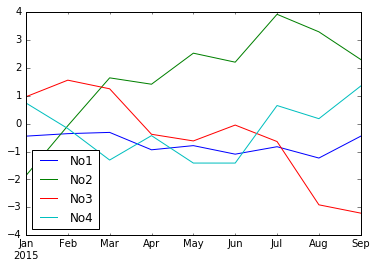

In [25]:
df.cumsum().plot()

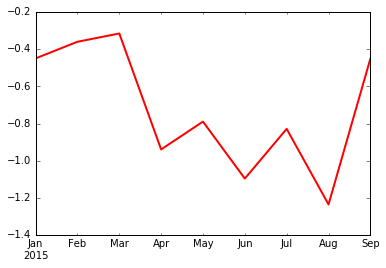

In [26]:
df['No1'].cumsum().plot(style='r', lw=2.)

In [32]:
GLD = pd.read_csv('C:/Users/karagiag/Downloads/Chan/GLD.csv', index_col=0, parse_dates=True)
GDX = pd.read_csv('C:/Users/karagiag/Downloads/Chan/GDX.csv', index_col=0, parse_dates=True)
data = pd.concat([GLD['Close'],GDX['Close']],axis=1)
data.columns = ['GLD','GDX']

In [34]:
rets = np.log(data/data.shift(1))

In [40]:
rets.columns = ['ret_gld','ret_gdx']

In [47]:
data['ret_gld'] = rets['ret_gld']
data['ret_gdx'] = rets['ret_gdx']

In [49]:
data.head()

,GLD,GDX,ret_gld,ret_gdx
Date,,,,
2012-09-20,171.470001,54.360001,NaN,NaN
2012-09-21,171.960007,54.810001,0.002854,0.008244
2012-09-24,171.050003,52.959999,-0.005306,-0.034336
2012-09-25,170.770004,52.169998,-0.001638,-0.015029
2012-09-26,169.809998,52.400002,-0.005637,0.004399


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A2DD2B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6F00F0>], dtype=object)

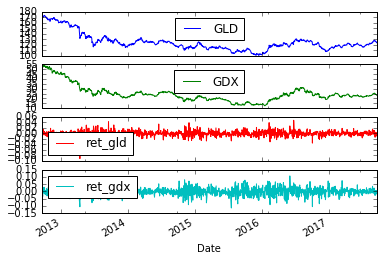

In [51]:
data.plot(subplots=True)

In [55]:
#This will be removed in future version use statsmodel instead
model = pd.ols(y=data['ret_gld'],x=data['ret_gdx'])
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1257
Number of Degrees of Freedom:   2

R-squared:         0.6097
Adj R-squared:     0.6094

Rmse:              0.0063

F-stat (1, 1255):  1960.4180, p-value:     0.0000

Degrees of Freedom: model 1, resid 1255

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.2924     0.0066      44.28     0.0000     0.2794     0.3053
     intercept    -0.0001     0.0002      -0.37     0.7122    -0.0004     0.0003
---------------------------------End of Summary---------------------------------

In [56]:
import statsmodels.api as sm

In [64]:
model = sm.OLS(data['ret_gld'],data['ret_gdx'],missing='drop')

In [65]:
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                ret_gld   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1964.
Date:                Fri, 22 Sep 2017   Prob (F-statistic):          5.11e-259
Time:                        15:24:19   Log-Likelihood:                 4593.8
No. Observations:                1257   AIC:                            -9186.
Df Residuals:                    1256   BIC:                            -9180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ret_gdx        0.2924      0.007     44.315      0.0

In [66]:
beta = results.params
#No constant is added for this regression, if I want to add constant look below example

ret_gdx    0.292447
dtype: float64

In [79]:
model = sm.OLS(data['ret_gld'],sm.add_constant(data['ret_gdx']),missing='drop')
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                ret_gld   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1960.
Date:                Fri, 22 Sep 2017   Prob (F-statistic):          1.17e-258
Time:                        15:40:50   Log-Likelihood:                 4593.9
No. Observations:                1257   AIC:                            -9184.
Df Residuals:                    1255   BIC:                            -9173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -6.523e-05      0.000     -0.369      0.7

In [80]:
results.params

const     -0.000065
ret_gdx    0.292387
dtype: float64

In [78]:
#plotting
import matplotlib.pyplot as plt

[]

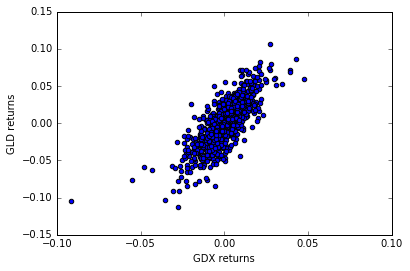

In [89]:
plt.scatter(data['ret_gld'],data['ret_gdx'])
plt.xlim(-0.10,0.10)
plt.xlabel('GDX returns')
plt.ylabel('GLD returns')
# Plot the regression line
figure = plt.gcf()
ax = plt.gca()
ax.plot()